In [1]:
%%capture
%cd ".."
%matplotlib widget
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}

import matplotlib
matplotlib.rcParams['figure.dpi'] = 85

# Demo - Feature collation

In [2]:
%%capture

from src.shaft import FeatureCollator
from pyhelpers.settings import np_preferences

np_preferences()

elr = ['ECM7', 'ECM8']

fc = FeatureCollator(elr=elr)

## 1. Calculate track movement

In [3]:
element = 'left top'
direction = 'up'
subsect_len = 10

trk_movement = fc.load_movement(element=element, direction=direction, subsect_len=subsect_len)
track_movement = list(trk_movement.values())[0]

track_movement.head()

,subsection,lateral_displacement_mean,lateral_displacement_std,lateral_displacement_abs_min,lateral_displacement_abs_max,vertical_displacement_mean,vertical_displacement_std,vertical_displacement_abs_min,vertical_displacement_abs_max,abs_minimum_displacement_mean,...,vertical_displacement_a_abs_min,vertical_displacement_a_abs_max,vertical_displacement_cen_mean,vertical_displacement_cen_std,vertical_displacement_cen_abs_min,vertical_displacement_cen_abs_max,vertical_displacement_b_mean,vertical_displacement_b_std,vertical_displacement_b_abs_min,vertical_displacement_b_abs_max
0,"LINESTRING Z (399428.96 653473.9 34.442, 39942...",-0.002879,0.000590,-0.001722,-0.003943,-0.002539,0.000454,-0.001798,-0.003203,0.002355,...,-0.001798,-0.003203,-0.002539,0.000454,-0.001798,-0.003203,-0.002539,0.000620,-0.001595,-0.003203
1,LINESTRING Z (399434.5201166851 653482.2116640...,-0.002754,0.000706,-0.001692,-0.004049,-0.001780,0.000596,-0.000803,-0.002796,0.002460,...,-0.000802,-0.002998,-0.001780,0.000596,-0.000803,-0.002796,-0.001680,0.000710,-0.000801,-0.002794
2,LINESTRING Z (399440.0608295194 653490.5362699...,-0.001841,0.000597,-0.001081,-0.002775,-0.001640,0.000522,-0.000509,-0.002205,0.001643,...,-0.000006,-0.002594,-0.001640,0.000522,-0.000509,-0.002205,-0.001740,0.000726,-0.000615,-0.003202
3,LINESTRING Z (399445.5700898784 653498.8817273...,-0.002032,0.000448,-0.001264,-0.002791,-0.000832,0.000245,-0.000498,-0.001309,0.001796,...,-0.000207,-0.002183,-0.000832,0.000245,-0.000498,-0.001309,-0.000783,0.000495,-0.000008,-0.001803
4,LINESTRING Z (399451.0456262118 653507.2493444...,-0.003821,0.000628,-0.002216,-0.004452,-0.000641,0.000316,-0.000006,-0.001003,0.003408,...,-0.000002,-0.001401,-0.000641,0.000316,-0.000006,-0.001003,-0.000542,0.000478,-0.000011,-0.001201


## 2. 'Buffers' for each subsection

In [4]:
fc.make_subsection_buffer(subsect_geom=track_movement.subsection, buf_type=1)
fc.subsection_buffer_cir

0       POLYGON ((399436.7438330039 653478.0532873138,...
1       POLYGON ((399442.2960951896 653486.3702044836,...
2       POLYGON ((399447.82064462325 653494.7055593994...
3       POLYGON ((399453.313882311 653503.061574425, 3...
4       POLYGON ((399458.76483011805 653511.4452325895...
                              ...                        
7625    POLYGON ((340180.7667521322 674101.3789181276,...
7626    POLYGON ((340171.395607632 674097.8888645377, ...
7627    POLYGON ((340162.02413708303 674094.3996894603...
7628    POLYGON ((340152.65430095716 674090.9061231156...
7629    POLYGON ((340143.2834838951 674087.4151913165,...
Name: subsection, Length: 7630, dtype: object

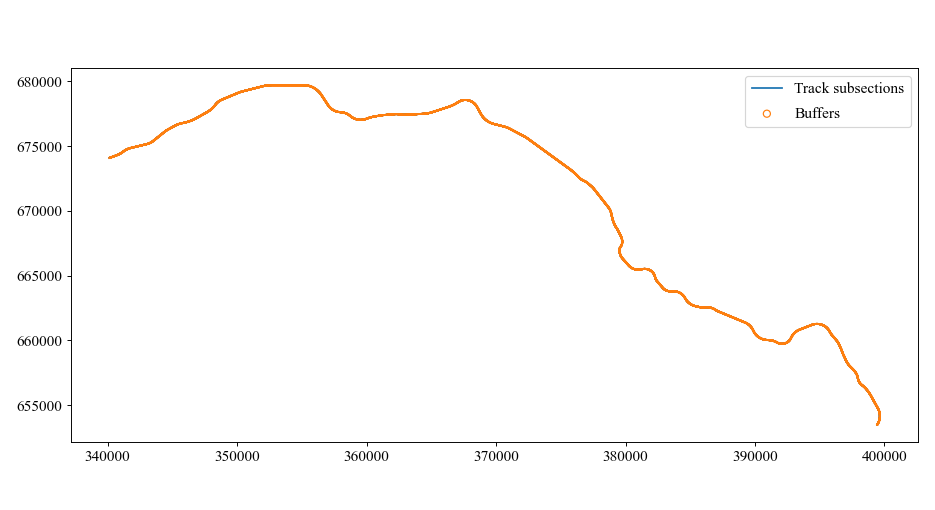

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure(figsize=(11, 6))
ax1 = fig1.add_subplot(aspect='equal', adjustable='box')

colours = plt.get_cmap('tab10').colors

for g in track_movement.subsection:
    g = np.array(g.coords)
    ax1.plot(g[:, 0], g[:, 1], color=colours[0])
plt.plot([], [], color=colours[0], label='Track subsections')

for buf in fc.subsection_buffer_cir:
    buf = np.array(buf.exterior.coords)
    ax1.plot(buf[:, 0], buf[:, 1], color=colours[1])
plt.scatter([], [], marker='o', fc='none', ec=colours[1], label='Buffers')

ax1.legend()
fig1.tight_layout()

## 3. Pseudo mileages

In [6]:
print(f"ELR:\n{list(fc.pseudo_mileage_dict.keys())}\n")
print(f"Track IDs:\n{list(fc.pseudo_mileage_dict['ECM8'].keys())}\n")
fc.pseudo_mileage_dict['ECM8'][1100]

ELR:
['ECM7', 'ECM8']

Track IDs:
[1100, 1200, 1700, 1900, 1901, 1902, 1903, 2100, 2200, 2700, 2900, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 3402, 3407, 3700, 3800, 3802, 3803, 3804, 3805, 3806, 3807, 3808]



,pseudo_geometry
pseudo_mileage,
0.1249,POINT Z (326840.7551999995 674148.2085999995 0)
0.1250,POINT Z (326841.6123599995 674148.5280749996 0)
0.1251,POINT Z (326842.4695199995 674148.8475499996 0)
0.1252,POINT Z (326843.3266799995 674149.1670249996 0)
0.1253,POINT Z (326844.1838399995 674149.4864999996 0)
...,...
54.1103,POINT Z (397818.2371883044 657443.5681087734 0)
54.1104,POINT Z (397818.7023412282 657442.7810315802 0)
54.1105,POINT Z (397819.167494152 657441.9939543869 0)


## 4. Ballast

In [7]:
fc.assign_pseudo_mileage_to_ballast(elr=elr, pseudo_mil_dict=fc.pseudo_mileage_dict)
fc.ballast_summary_

,ID,GEOGIS Switch ID,Track priority,Operating route,SRS,ELR,TID,Start Mile,Start Yard,End Mile,...,Sleeper used life fraction,Ballast fouling index,Switch used life fraction,LTSF,BCF,StartMileage,EndMileage,pseudo_geometry_start,pseudo_geometry_end,pseudo_geometry
0,221491,NaN,Running lines,LNE,G.10,ECM7,1100,0,0,0,...,0.74,0.44,0.00,1.00,1.27,0.0000,0.0054,POINT Z (424617.65787741385 563817.2014027964 0),POINT Z (424666.8570424306 563821.3953917463 0),LINESTRING Z (424617.65787741385 563817.201402...
1,221492,NaN,Running lines,LNE,G.10,ECM7,1100,0,54,0,...,0.74,0.44,0.00,1.00,1.27,0.0054,0.0060,POINT Z (424666.8570424306 563821.3953917463 0),POINT Z (424672.446802165 563821.8718915111 0),LINESTRING Z (424666.8570424306 563821.3953917...
2,221493,NaN,Running lines,LNE,G.10,ECM7,1100,0,60,0,...,0.39,0.44,0.00,0.92,1.27,0.0060,0.0066,POINT Z (424672.446802165 563821.8718915111 0),POINT Z (424678.0365618993 563822.3483912759 0),LINESTRING Z (424672.446802165 563821.87189151...
3,221494,NaN,Running lines,LNE,G.10,ECM7,1100,0,66,0,...,0.40,0.46,0.00,0.92,1.28,0.0066,0.0084,POINT Z (424678.0365618993 563822.3483912759 0),POINT Z (424694.8074982702 563823.7573691774 0),LINESTRING Z (424678.0365618993 563822.3483912...
4,221495,NaN,Running lines,LNE,G.10,ECM7,1100,0,84,0,...,0.43,0.46,0.00,0.92,1.28,0.0084,0.0092,POINT Z (424694.8074982702 563823.7573691774 0),POINT Z (424702.265883209 563824.3261790044 0),LINESTRING Z (424694.8074982702 563823.7573691...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,230311,NaN,Running lines,Scotland,G.11,ECM8,3800,3,694,3,...,1.06,0.47,0.00,0.65,1.29,3.0694,3.0748,POINT Z (330859.5571851924 673253.5898562543 0),POINT Z (330907.5838895333 673241.5453524025 0),LINESTRING Z (330859.5571851924 673253.5898562...
8180,230312,NaN,Running lines,Scotland,G.11,ECM8,3800,3,748,3,...,1.06,0.47,0.00,0.65,1.29,3.0748,3.0749,POINT Z (330907.5838895333 673241.5453524025 0),POINT Z (330908.473272947 673241.322306035 0),LINESTRING Z (330907.5838895333 673241.5453524...
8181,230313,NaN,Running lines,Scotland,G.11,ECM8,3800,3,749,3,...,1.06,0.47,0.00,0.72,1.29,3.0749,3.0777,POINT Z (330908.473272947 673241.322306035 0),POINT Z (330933.3171053747 673234.8605545196 0),LINESTRING Z (330908.473272947 673241.32230603...
8182,230314,NaN,Running lines,Scotland,G.11,ECM8,3800,3,777,3,...,1.06,0.47,0.00,0.65,1.29,3.0777,3.0832,POINT Z (330933.3171053747 673234.8605545196 0),POINT Z (330981.5182506089 673220.06180658 0),LINESTRING Z (330933.3171053747 673234.8605545...


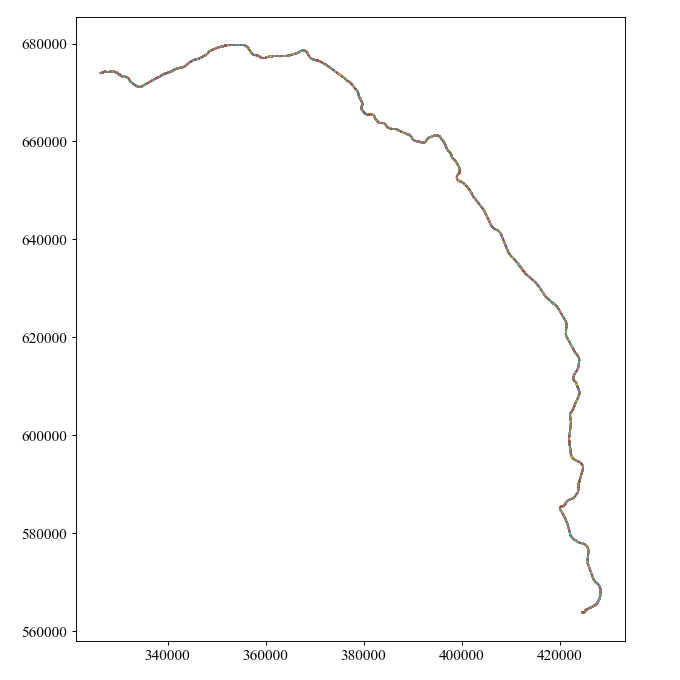

In [8]:
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(aspect='equal', adjustable='box')

for g in fc.ballast_summary_.pseudo_geometry:
    g_ = np.array(g.coords)
    ax2.plot(g_[:, 0], g_[:, 1])

fig2.tight_layout()

In [9]:
fc.collate_ballast_features(elr=elr)
fc.ballast_features.reset_index()

,subsection,Curvature,Cant,Max speed,Max axle load
0,"LINESTRING Z (399428.96 653473.9 34.442, 39942...",-0.000210,-18.06,75.0,26.0
1,LINESTRING Z (399434.5201166851 653482.2116640...,-0.000210,-18.06,75.0,26.0
2,LINESTRING Z (399440.0608295194 653490.5362699...,-0.000210,-18.06,75.0,26.0
3,LINESTRING Z (399445.5700898784 653498.8817273...,-0.000592,-50.87,75.0,26.0
4,LINESTRING Z (399451.0456262118 653507.2493444...,-0.000592,-50.87,75.0,26.0
...,...,...,...,...,...
7625,LINESTRING Z (340180.451306418 674103.12674018...,0.000000,0.00,125.0,26.0
7626,LINESTRING Z (340171.0809418422 674099.6346047...,0.000000,0.00,125.0,26.0
7627,LINESTRING Z (340161.7096778383 674096.1448800...,0.000000,0.00,125.0,26.0
7628,LINESTRING Z (340152.3387371677 674092.6542742...,0.000000,0.00,125.0,26.0


## 5. CARRS and OPAS

<span style="font-size:1.1em;font-weight:bold">(incl. overline bridges, underline bridges, retaining walls, tunnels and stations)</span>

In [10]:
# Overline bridges
overline_bridges = fc.carrs.load_overline_bridges_shp(elr=elr)
fc.collate_nearest_structure(overline_bridges, structure_name='Overline bridges')

# Underline bridges
underline_bridges = fc.carrs.load_underline_bridges_shp(elr=elr)
fc.collate_nearest_structure(underline_bridges, structure_name='Underline bridges')

# Retaining walls
retaining_walls = fc.carrs.load_retaining_walls_shp(elr=elr)
fc.collate_nearest_structure(retaining_walls, structure_name='Retaining walls')

# Tunnels
tunnels = fc.carrs.load_tunnels_shp(elr=elr)
fc.collate_nearest_structure(tunnels, structure_name='Tunnels')

# Stations
stations = fc.opas.load_stations_shp()
fc.collate_nearest_structure(stations, structure_name='Stations')

for k, v in fc.structures_.items():
    print(f"{k}:\n{v}\n\n")

Overline bridges:
                                                    Overline bridges
subsection                                                          
LINESTRING Z (399428.96 653473.9 34.442, 399429...                 0
LINESTRING Z (399434.5201166851 653482.21166400...                 0
LINESTRING Z (399440.0608295194 653490.53626990...                 0
LINESTRING Z (399445.5700898784 653498.88172736...                 0
LINESTRING Z (399451.0456262118 653507.24934441...                 0
...                                                              ...
LINESTRING Z (340180.451306418 674103.126740184...                 0
LINESTRING Z (340171.0809418422 674099.63460474...                 0
LINESTRING Z (340161.7096778383 674096.14488000...                 0
LINESTRING Z (340152.3387371677 674092.65427427...                 0
LINESTRING Z (340142.9690238989 674089.16038136...                 0

[7630 rows x 1 columns]


Underline bridges:
                                       

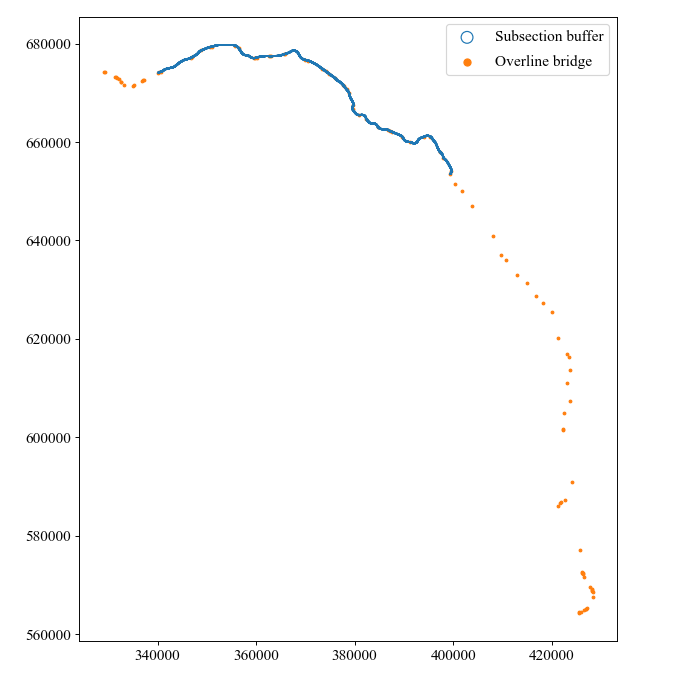

In [11]:
fig3 = plt.figure(figsize=(8, 8))
ax3 = fig3.add_subplot(aspect='equal', adjustable='box')

for buf in fc.subsection_buffer_cir:
    buf_ = np.array(buf.exterior.coords)
    ax3.plot(buf_[:, 0], buf_[:, 1], color=colours[0])
ax3.scatter([], [], 100, marker='o', fc='none', ec=colours[0], label='Subsection buffer')

for ob in overline_bridges.geometry:
    ax3.scatter(ob.x, ob.y, color=colours[1], s=5)
ax3.scatter([], [], marker='o', color=colours[1], label='Overline bridge')

ax3.legend()
fig3.tight_layout()

## 6. INM

In [12]:
fc.assign_pseudo_mileage_to_inm_cdr(elr=elr, pseudo_mil_dict=fc.pseudo_mileage_dict)
fc.inm_combined_data_report_

,RTE_NAME,RTE_ORG_CODE,MDU_NAME,MDU_ORG_CODE,TME_NAME,TME_ORG_CODE,TSM_NAME,TSM_ORG_CODE,ELR,REF_TRACKID,...,MAX_AXLE_WEIGHT,ANNUAL_TONNAGE,TRACK_PRIORITY,OLD_TRACK_CATEGORY,OVERRIDE,RELAYINGPOLICY,TRACK_POSITION,pseudo_geometry_start,pseudo_geometry_end,pseudo_geometry
0,London North East,QG,Newcastle MDU - HG8,HG8,TME Newcastle,HG8065,TSM Newcastle,HG806551,ECM7,2200,...,25.5,3.580000,5.0,035H07,NaN,0,5.0,POINT Z (424635.8603999997 563764.4418000001 0),POINT Z (424678.3119564592 563777.4414333581 0),LINESTRING Z (424635.8603999997 563764.4418000...
1,London North East,QG,Newcastle MDU - HG8,HG8,TME Newcastle,HG8065,TSM Newcastle,HG806551,ECM7,3900,...,0.0,0.000000,40.0,035N01,NaN,0,7.0,POINT Z (424639.1655999999 563754.7467999998 0),POINT Z (424648.0074594113 563757.6448257418 0),LINESTRING Z (424639.1655999999 563754.7467999...
2,London North East,QG,Newcastle MDU - HG8,HG8,TME Newcastle,HG8065,TSM Newcastle,HG806551,ECM7,1200,...,25.5,3.820000,6.0,035H07,NaN,0,6.0,POINT Z (424637.4572000001 563759.7326999996 0),POINT Z (424679.11105852 563772.9028673521 0),LINESTRING Z (424637.4572000001 563759.7326999...
3,London North East,QG,Newcastle MDU - HG8,HG8,TME Newcastle,HG8065,TSM Newcastle,HG806551,ECM7,3804,...,21.0,1.230000,3.0,075H03,NaN,0,3.0,POINT Z (424633.2932000002 563788.2982999999 0),POINT Z (424672.7931887727 563797.5249454409 0),LINESTRING Z (424633.2932000002 563788.2982999...
4,London North East,QG,Newcastle MDU - HG8,HG8,TME Newcastle,HG8065,TSM Newcastle,HG806551,ECM7,3805,...,25.5,2.280000,4.0,035H03,NaN,0,4.0,POINT Z (424634.2836999996 563783.1506999992 0),POINT Z (424673.8222455132 563792.7626978655 0),LINESTRING Z (424634.2836999996 563783.1506999...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,Scotland,QL,Edinburgh MDU - HL3,HL3,TME Edinburgh,HL3003,TSM Portobello,HL300301,ECM8,1100,...,25.4,27.436085,1.0,105H30,NaN,NaN,1.0,POINT Z (397784.7921271768 657497.0468950452 0),POINT Z (397820.0977999996 657440.4198000003 0),LINESTRING Z (397784.7921271768 657497.0468950...
5506,Scotland,QL,Edinburgh MDU - HL3,HL3,TME Edinburgh,HL3003,TSM Portobello,HL300301,ECM8,2100,...,25.4,28.695518,2.0,105H30,NaN,NaN,2.0,POINT Z (397784.0568321093 657491.7304964288 0),POINT Z (397795.8631259135 657473.2454296587 0),LINESTRING Z (397784.0568321093 657491.7304964...
5507,Scotland,QL,Edinburgh MDU - HL3,HL3,TME Edinburgh,HL3003,TSM Portobello,HL300301,ECM8,2100,...,25.4,28.695518,2.0,105H30,NaN,NaN,2.0,POINT Z (397795.8631259135 657473.2454296587 0),POINT Z (397814.5068879423 657442.8681538006 0),LINESTRING Z (397795.8631259135 657473.2454296...
5508,Scotland,QL,Edinburgh MDU - HL3,HL3,TME Edinburgh,HL3003,TSM Portobello,HL300301,ECM8,2100,...,25.4,28.695518,2.0,105H30,NaN,NaN,2.0,POINT Z (397814.5068879423 657442.8681538006 0),POINT Z (397815.4564527655 657441.3062922806 0),LINESTRING Z (397814.5068879423 657442.8681538...


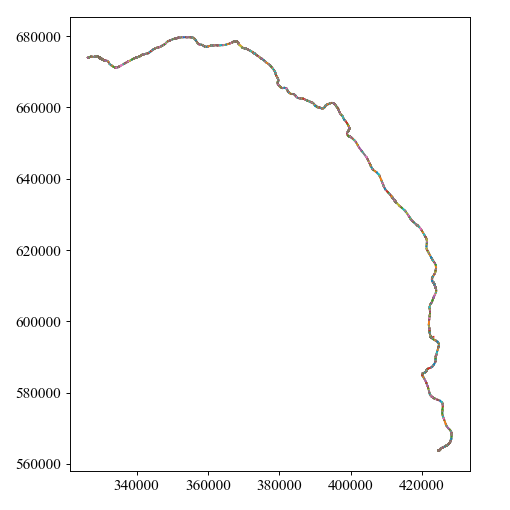

In [13]:
fig4 = plt.figure(figsize=(6, 6))
ax4 = fig4.add_subplot(aspect='equal', adjustable='box')

for g in fc.inm_combined_data_report_.pseudo_geometry:
    g_ = np.array(g.coords)
    ax4.plot(g_[:, 0], g_[:, 1])

fig4.tight_layout()